<center>
<h2>
Part 1. Rock, Paper, Scissors
</h2>
</center>

In [65]:
import numpy as np
import matplotlib.pyplot as plt

from code.visualization import *
from code.bandits import BernoulliBandit
from code.algorithms import UCB

In [8]:
save_fig_flag = False

Question 1

In [3]:
actions = ["rock", "paper", "scissors"]
L = np.array([
    [0, 1, -1], 
    [-1, 0, 1], 
    [1, -1, 0]
])
print(L)

[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]


Question 2a

In [4]:
def rand_weighted(prob):
    q = np.random.rand()
    p = np.cumsum(prob)
    t = (p-q) >= 0
    return np.nonzero(t)[0][0]

Question 2b

In [5]:
def EWA_update(prob, loss, eta=1):
    num =  prob * np.exp(-eta * loss)
    denom = np.dot(prob, np.exp(-eta * loss))
    return num / denom

Question 3a

In [6]:
def fixed_EW(q, eta=1, T=100, n=10):
    p1 = 1/3 * np.ones(3)
    loss = []
    p = []
    regret = []
    for sim in range(n):
        pt = p1
        p_in_time = [p1]
        loss_in_time = []
        loss_per_action = np.zeros(3)
        regret_in_time = []
        for t in range(1,T):
            i_t = rand_weighted(pt)
            j_t = rand_weighted(q)
            loss_t = L[i_t,j_t]
            loss_in_time.append(loss_t)
            
            pt = EWA_update(pt, L[:,j_t], eta)
            p_in_time.append(pt)
            
            loss_per_action += L[:,j_t]
            regret_in_time.append(sum(loss_in_time)-np.amin(loss_per_action))
        
        loss.append(loss_in_time)
        p.append(p_in_time)
        regret.append(regret_in_time)
    return p, loss, regret

In [7]:
q = [1/2, 1/4, 1/4]
p, loss, regret = fixed_EW(q=q, n=1)

Question 3b

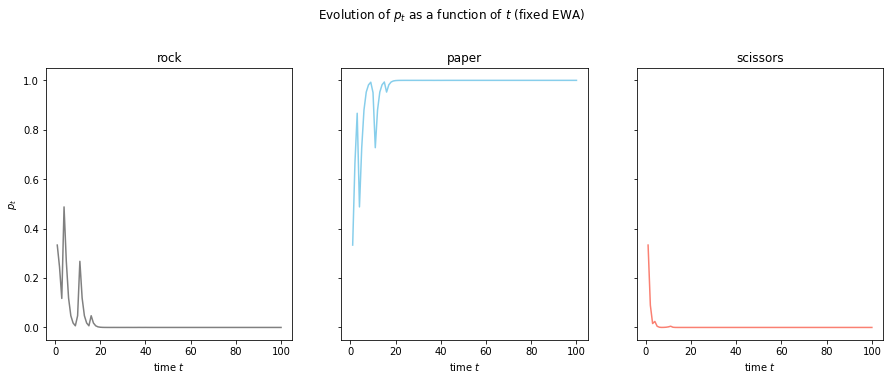

In [9]:
plot_p(p[0], save_fig=save_fig_flag, algo='fixed EWA')

Question 3c

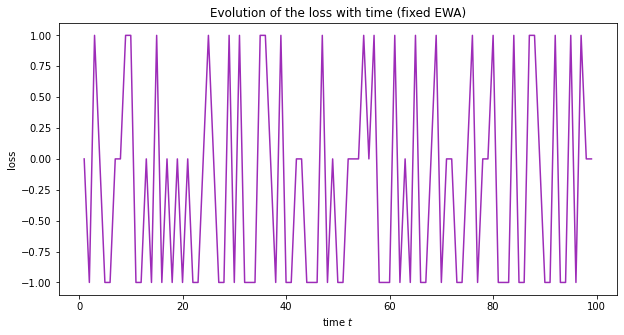

In [10]:
plot_loss(loss[0], save_fig=save_fig_flag, algo='fixed EWA')

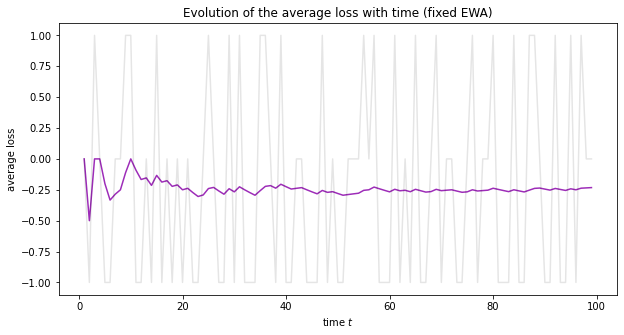

In [11]:
plot_avg_loss(loss[0], save_fig=save_fig_flag, algo='fixed EWA')

Question 3d

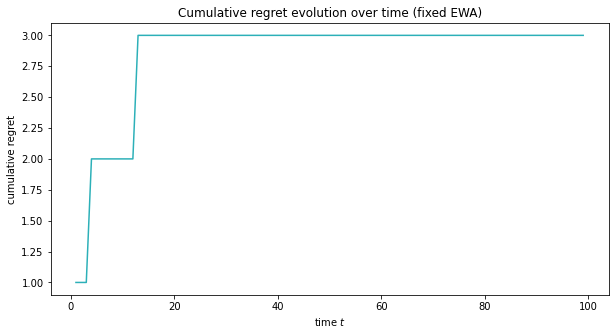

In [12]:
plot_cumul_regret(regret[0], save_fig=save_fig_flag, algo='fixed EWA')

Question 3e

In [13]:
n = 10
q = [1/2, 1/4, 1/4]
p, loss, regret = fixed_EW(q=q, n=n)

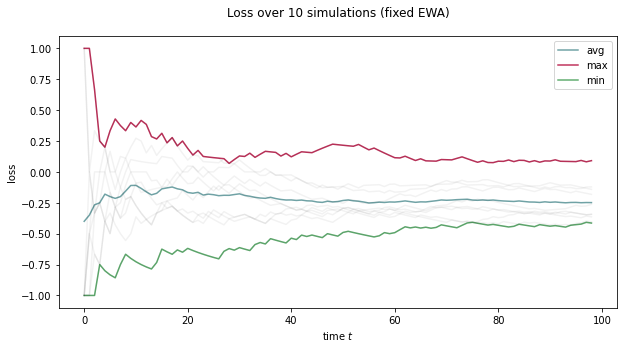

In [14]:
plot_avg_loss_minmax(loss, save_fig=save_fig_flag, algo='fixed EWA')

Question 3f

In [15]:
etas = [0.01, 0.05, 0.1, 0.5, 1]
avg_final_regrets = []
T = 100 
n = 50

for eta in etas:
    _, _, regret = fixed_EW(q=q, n=n, eta=eta, T=T)
    regret = np.array(regret)
    final_regret = regret[:,-1]
    avg_final_regret = np.mean(final_regret)
    avg_final_regrets.append(avg_final_regret)

print(f'theoretical best $\eta$: {np.sqrt(np.log(3)/T):.3f}')
print(f'empirical best $\eta$: {etas[np.argmin(np.array(avg_final_regrets))]:.3f}')

theoretical best $\eta$: 0.105
empirical best $\eta$: 1.000


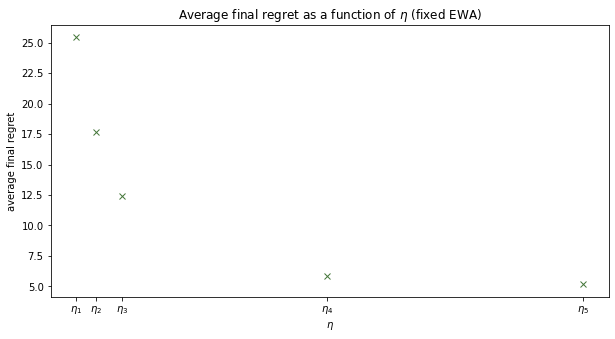

In [16]:
title = 'Average final regret as a function of $\eta$'
plot_final_regret_eta(etas, avg_final_regrets, color='#447639', save_fig=save_fig_flag, title=title, algo='fixed EWA')

Question 4a

In [17]:
def adaptative_EW(eta=0.05, eta_q=0.05, T=100, n=10):
    p_1 = 1/3 * np.ones(3)
    q_1 = 1/3 * np.ones(3)
    loss = []
    p = []
    q = []
    regret = []
    for sim in range(n):
        p_t = p_1
        q_t = q_1
        p_in_time = [p_1]
        q_in_time = [q_1]
        loss_in_time = []
        loss_per_action = np.zeros(3)
        regret_in_time = []
        for t in range(1,T):
            i_t = rand_weighted(p_t)
            j_t = rand_weighted(q_t)
            loss_t = L[i_t,j_t]
            loss_in_time.append(loss_t)
            
            p_t = EWA_update(p_t, L[:,j_t], eta)
            p_in_time.append(p_t)
            q_t = EWA_update(q_t, L[:,i_t], eta_q)
            q_in_time.append(q_t)
            
            loss_per_action += L[:,j_t]
            regret_in_time.append(sum(loss_in_time)-np.amin(loss_per_action))
        
        loss.append(loss_in_time)
        p.append(p_in_time)
        q.append(q_in_time)
        regret.append(regret_in_time)
    return p, q, loss, regret

In [18]:
T = 100
n = 10
sim_idx = 0

p, q, loss, regret = adaptative_EW(n=n)

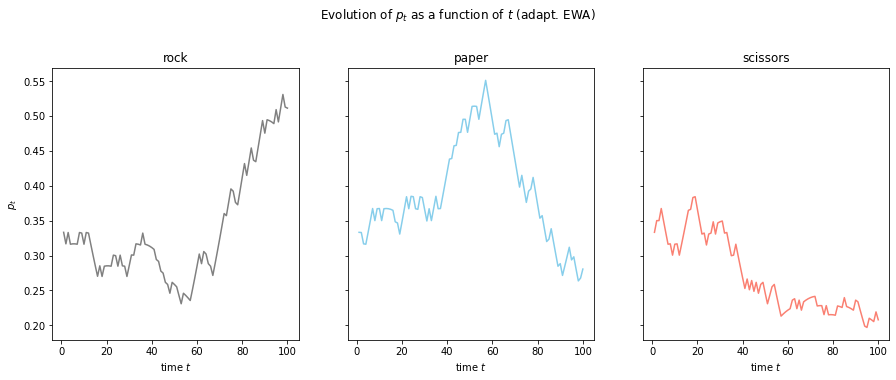

In [19]:
plot_p(p[sim_idx], save_fig=save_fig_flag, save_name='p1_4b_p', algo='adapt. EWA')

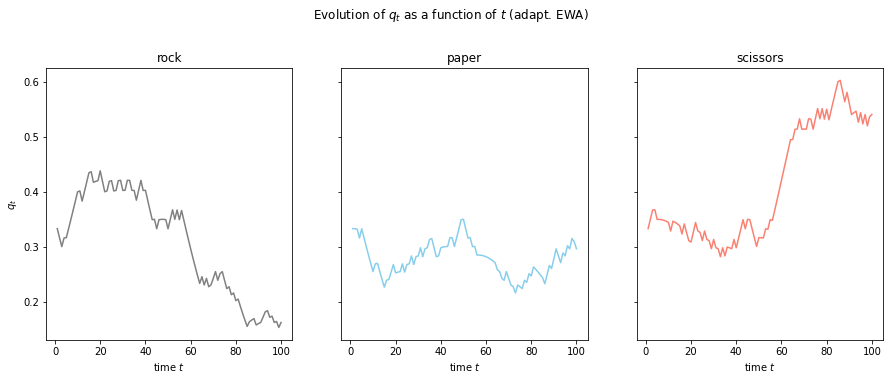

In [20]:
plot_p(q[sim_idx], save_fig=save_fig_flag, save_name='p1_4b_q', player='q', algo='adapt. EWA')

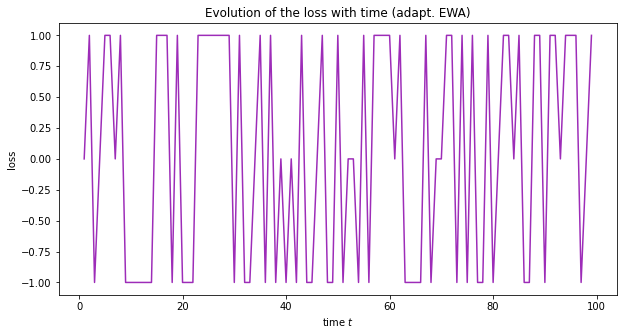

In [21]:
plot_loss(loss[sim_idx], save_fig=save_fig_flag, save_name='p1_4a', algo='adapt. EWA')

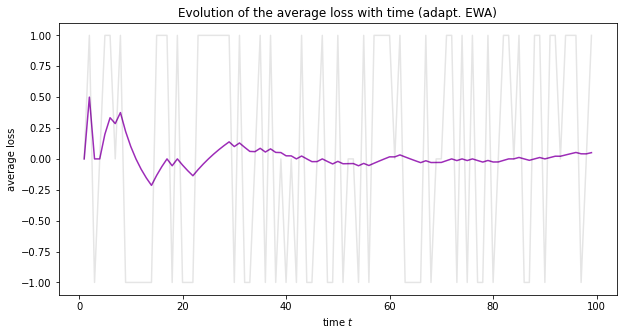

In [22]:
plot_avg_loss(loss[sim_idx], save_fig=save_fig_flag, save_name='p1_4c', algo='adapt. EWA')

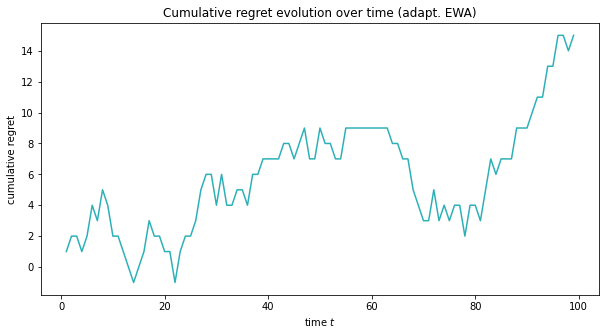

In [23]:
plot_cumul_regret(regret[sim_idx], save_fig=save_fig_flag, save_name='p1_4d', algo='adapt. EWA')

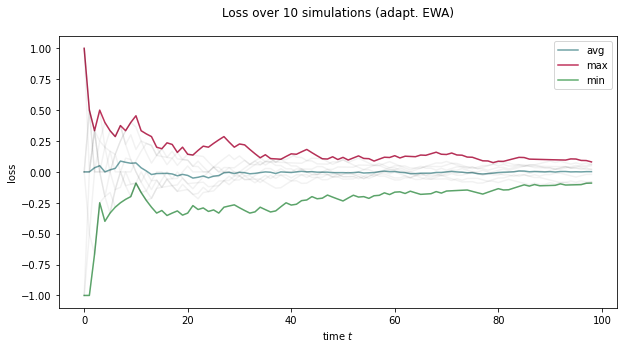

In [24]:
plot_avg_loss_minmax(loss, save_fig=save_fig_flag, save_name='p1_4e', algo='adapt. EWA')

Question 4b

In [66]:
T = 10000
n = 10

p, q, loss, regret = adaptative_EW(n=n, T=T)

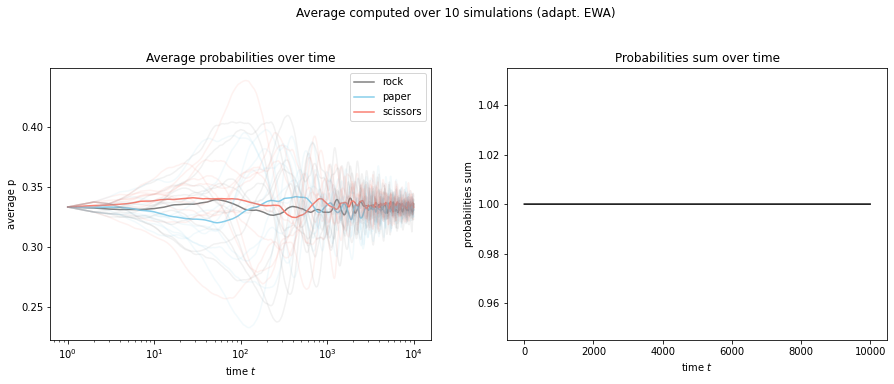

In [67]:
tot_prob = plot_avg_p(p, save_fig=save_fig_flag, algo='adapt. EWA')

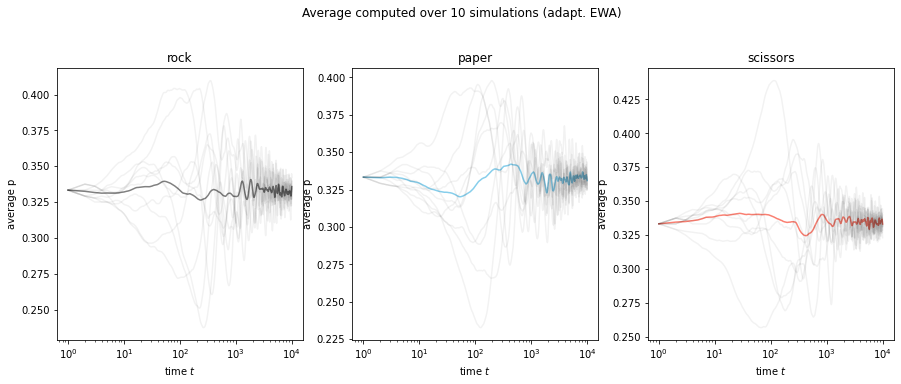

In [68]:
plot_avg_p_in_individual_boxes(p, save_fig=save_fig_flag, algo='adapt. EWA')

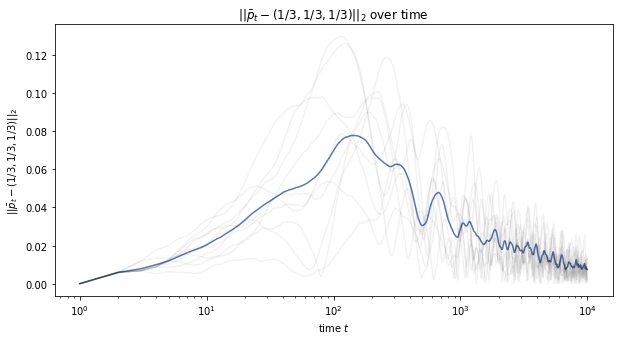

In [69]:
plot_p_log_scale(p, save_fig=save_fig_flag, save_name='p1_4b_logscale_p', algo='adapt. EWA')

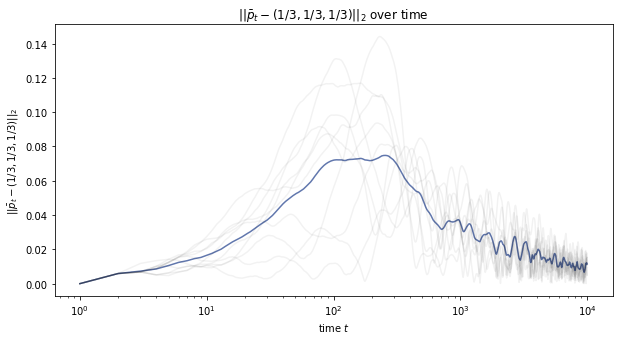

In [70]:
plot_p_log_scale(q, save_fig=save_fig_flag, save_name='p1_4b_logscale_q', algo='adapt. EWA')

say a few words on the fact that p_t does seem to converge towards (1/3, 1/3, 1/3), which is the only Nash equilibrium of this 2-player game (is it?)

Question 5a

In [30]:
L = np.array([
    [0.5, 1, 0], 
    [0, 0.5, 1], 
    [1, 0, 0.5]
])
print(L)

[[0.5 1.  0. ]
 [0.  0.5 1. ]
 [1.  0.  0.5]]


In [31]:
def estimated_loss(p_t, i_t, Lij_t):
    M = len(p_t)
    e_loss = np.zeros(M)
    e_loss[i_t] = Lij_t / (p_t[i_t] + 1e-10)
    return e_loss

Question 5b

In [32]:
def EXP3_update(p_t, i_t, Lij_t, eta=1):
    g_t = estimated_loss(p_t, i_t, Lij_t)
    num =  p_t * np.exp(-eta * g_t)
    denom = np.dot(p_t, np.exp(-eta * g_t))
    return num / (denom + 1e-10)

Question 6

In [33]:
def fixed_EXP3(q, eta=1, T=100, n=10):
    p_1 = 1/3 * np.ones(3)
    loss = []
    p = []
    regret = []
    for sim in range(n):
        p_t = p_1
        p_in_time = [p_1]
        loss_in_time = []
        loss_per_action = np.zeros(3)
        regret_in_time = []
        for t in range(1,T):
            i_t = rand_weighted(p_t)
            j_t = rand_weighted(q)
            loss_t = L[i_t,j_t]
            loss_in_time.append(loss_t)
            
            p_t = EXP3_update(p_t, i_t, L[i_t,j_t], eta)
            p_in_time.append(p_t)
            
            loss_per_action += L[:,j_t]
            regret_in_time.append(sum(loss_in_time)-np.amin(loss_per_action))
        
        loss.append(loss_in_time)
        p.append(p_in_time)
        regret.append(regret_in_time)
    return p, loss, regret

In [34]:
q = [1/2, 1/4, 1/4]
p, loss, regret = fixed_EXP3(q=q, n=1)

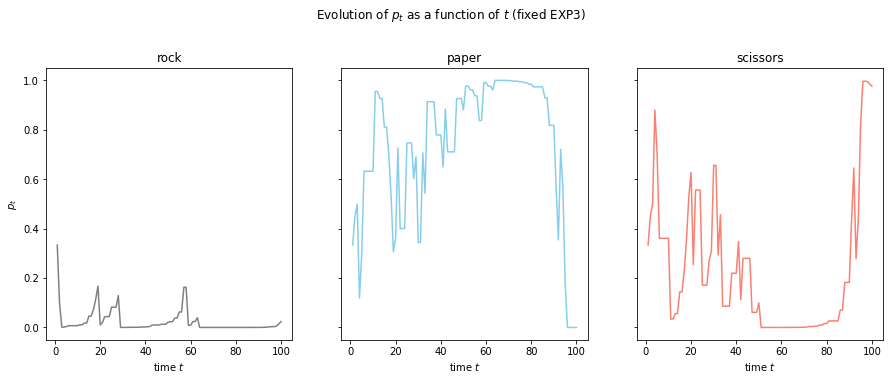

In [35]:
plot_p(p[0], save_fig=save_fig_flag, save_name='p1_6b', algo='fixed EXP3')

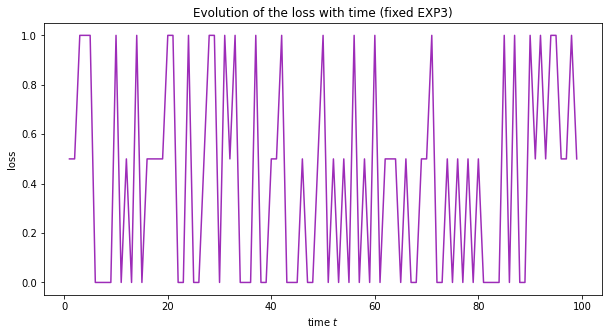

In [36]:
plot_loss(loss[0], save_fig=save_fig_flag, save_name='p1_6a', algo='fixed EXP3')

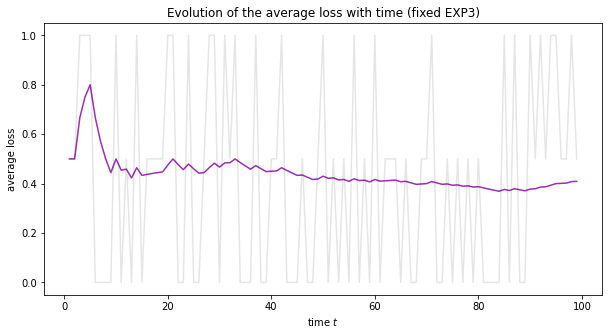

In [37]:
plot_avg_loss(loss[0], save_fig=save_fig_flag, save_name='p1_6c', algo='fixed EXP3')

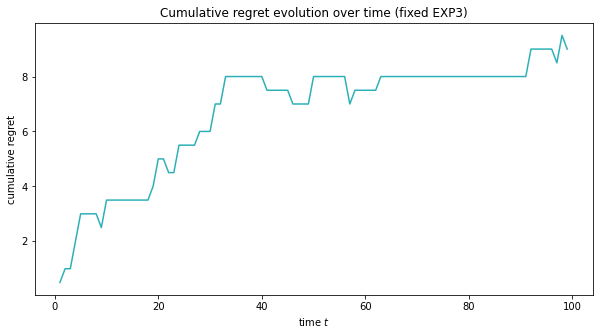

In [38]:
plot_cumul_regret(regret[0], save_fig=save_fig_flag, save_name='p1_6d', algo='fixed EXP3')

In [39]:
n = 10
q = [1/2, 1/4, 1/4]
p, loss, regret = fixed_EXP3(q=q, n=n)

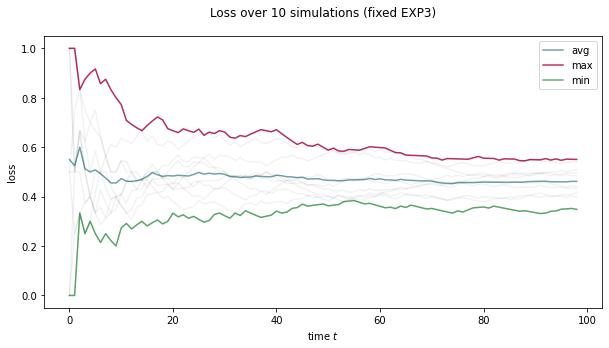

In [40]:
plot_avg_loss_minmax(loss, save_fig=save_fig_flag, save_name='p1_6e', algo='fixed EXP3')

In [41]:
etas = [0.01, 0.05, 0.1, 0.5, 1]
avg_final_regrets = []
T = 100 
n = 50

for eta in etas:
    _, _, regret = fixed_EXP3(q=q, n=n, eta=eta, T=T)
    regret = np.array(regret)
    final_regret = regret[:,-1]
    avg_final_regret = np.mean(final_regret)
    avg_final_regrets.append(avg_final_regret)

print(f'theoretical best $\eta$: {np.sqrt(np.log(3)/T):.3f}')
print(f'empirical best $\eta$: {etas[np.argmin(np.array(avg_final_regrets))]:.3f}')

theoretical best $\eta$: 0.105
empirical best $\eta$: 0.500


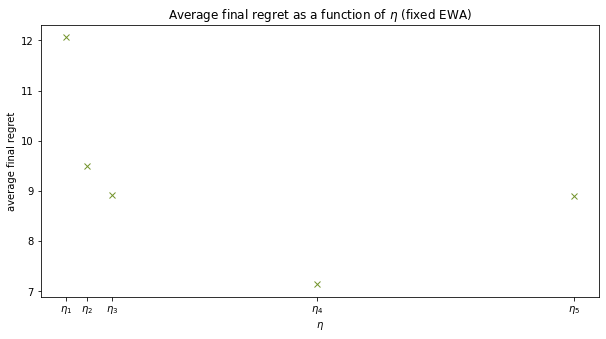

In [42]:
title = 'Average final regret as a function of $\eta$'
plot_final_regret_eta(etas, avg_final_regrets, color='#73942B', save_fig=save_fig_flag, save_name='p1_6f', title=title, algo='fixed EWA')

Question 7

In [43]:
def adaptative_EXP3(eta=0.05, eta_q=0.05, T=100, n=10):
    p_1 = 1/3 * np.ones(3)
    q_1 = 1/3 * np.ones(3)
    loss = []
    p = []
    q = []
    regret = []
    for sim in range(n):
        p_t = p_1
        q_t = q_1
        p_in_time = [p_1]
        q_in_time = [q_1]
        loss_in_time = []
        loss_per_action = np.zeros(3)
        regret_in_time = []
        for t in range(T):
            i_t = rand_weighted(p_t)
            j_t = rand_weighted(q_t)
            loss_t = L[i_t,j_t]
            loss_in_time.append(loss_t)
            
            p_t = EXP3_update(p_t, i_t, L[i_t,j_t], eta)
            p_in_time.append(p_t)
            q_t = EXP3_update(q_t, j_t, L[j_t,i_t], eta_q)
            q_in_time.append(q_t)
            
            loss_per_action += L[:,j_t]
            regret_in_time.append(sum(loss_in_time)-np.amin(loss_per_action))
        
        loss.append(loss_in_time)
        p.append(p_in_time)
        q.append(q_in_time)
        regret.append(regret_in_time)
    return p, q, loss, regret

In [44]:
T = 100
n = 10

p, q, loss, regret = adaptative_EXP3(n=n)

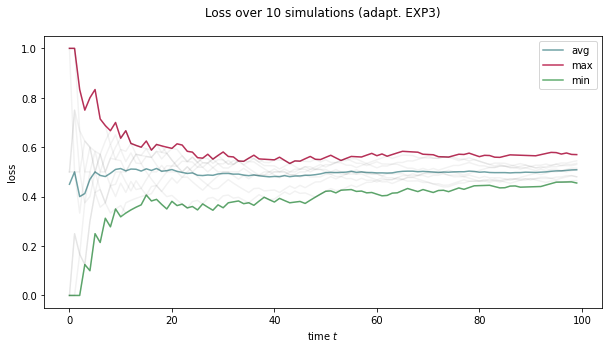

In [45]:
plot_avg_loss_minmax(loss, save_fig=save_fig_flag, save_name='p1_7e', algo='adapt. EXP3')

In [51]:
T = 10000
n = 10

p, q, loss, regret = adaptative_EXP3(n=n, T=T)

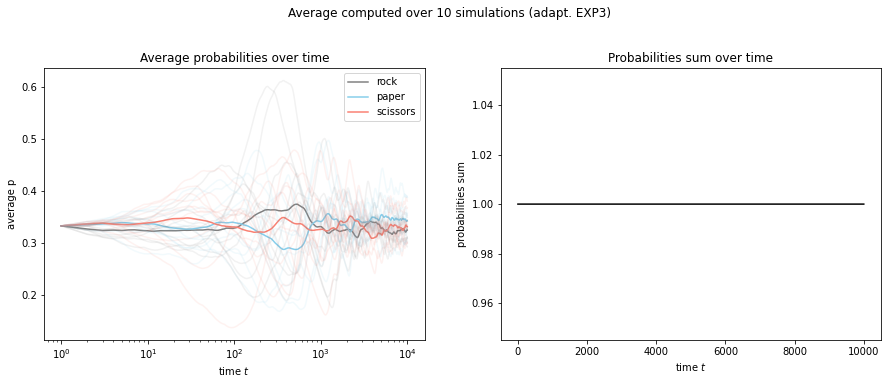

In [52]:
plot_avg_p(p, save_fig=save_fig_flag, save_name='p1_7b_avg', algo='adapt. EXP3')

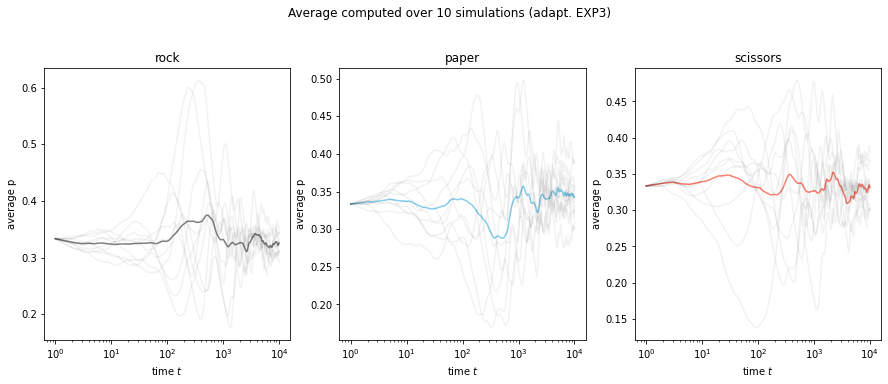

In [53]:
plot_avg_p_in_individual_boxes(p, save_fig=save_fig_flag, save_name='p1_7b_indiv', algo='adapt. EXP3')

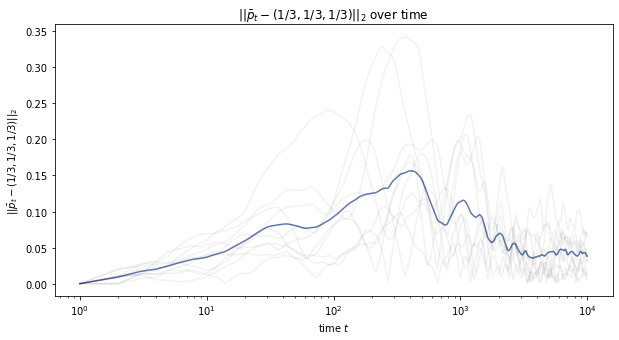

In [54]:
plot_p_log_scale(p, save_fig=save_fig_flag, save_name='p1_7b_logscale_p', algo='adapt. EXP3')

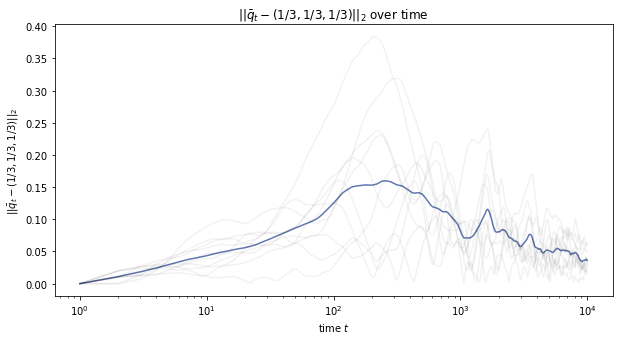

In [55]:
plot_p_log_scale(q, save_fig=save_fig_flag, save_name='p1_7b_logscale_q', player='q', algo='adapt. EXP3')

Question 8 (**optional**)

In [58]:
def EXP3_vs_UCB(eta=0.05, eta_q=0.05, T=100, n=10):
    p_1 = 1/3 * np.ones(3)
    bern_bandit = BernoulliBandit(K)
    ucb_custom = UCB(bern_bandit, sigma_square)
    loss = []
    p = []
    exp3_regret = np.zeros((n,T))
    ucb_custom_regret = np.zeros((n,T))
    for sim in range(n):
        p_t = p_1
        p_in_time = [p_1]
        bern_bandit = BernoulliBandit(K)
        ucb_custom = UCB(bern_bandit, sigma_square)
        loss_in_time = []
        loss_per_action = np.zeros(3)
        exp3_regret_in_time = []
        ucb_custom_regret_in_time = []
        for t in range(T):
            i_t = rand_weighted(p_t)
            j_t = ucb_custom.select_next_arm()
            loss_t = L[i_t,j_t]
            loss_in_time.append(loss_t)
            # update count
            ucb_custom.counts[j_t] += 1
            # update reward
            ucb_custom.reward = -loss_t
            ucb_custom.rewards[j_t] += ucb_custom.reward
            # update estimate
            ucb_custom.mean_estimates[j_t] += 1 / ucb_custom.counts[j_t] * (ucb_custom.reward - ucb_custom.mean_estimates[j_t])
            # update regret
            ucb_custom.regret += ucb_custom.bandit.best_prob - ucb_custom.bandit.probs[j_t]
            ucb_custom.cum_regret.append(ucb_custom.regret)
            
            p_t = EXP3_update(p_t, i_t, L[i_t,j_t], eta)
            p_in_time.append(p_t)
            
            loss_per_action += L[:,j_t]
            exp3_regret_in_time.append(sum(loss_in_time)-np.amin(loss_per_action))
            ucb_custom_regret_in_time.append(ucb_custom.regret)
        
        loss.append(loss_in_time)
        p.append(p_in_time)
        exp3_regret[sim] = exp3_regret_in_time
        ucb_custom_regret[sim] = ucb_custom_regret_in_time
    return p, loss, exp3_regret, ucb_custom_regret

In [61]:
K = 3
T = 1000
n = 1000
sigma_square = 1./4

p, loss, exp3_regret, ucb_custom_regret = EXP3_vs_UCB(n=n, T=T)

In [62]:
regret_dict = {
    'EXP3': [exp3_regret, '#CB4335'],
    'UCB': [ucb_custom_regret, '#3A6FB6']
}

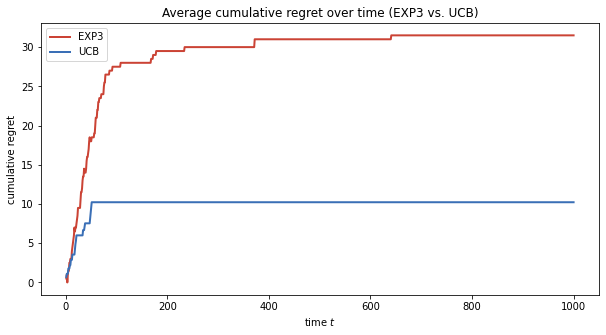

In [63]:
title = 'Average cumulative regret over time (EXP3 vs. UCB)'
plot_multiple_avg_regrets(regret_dict, save_fig=save_fig_flag, save_name='p2_2g_exp3_vs_ucb', title=title)

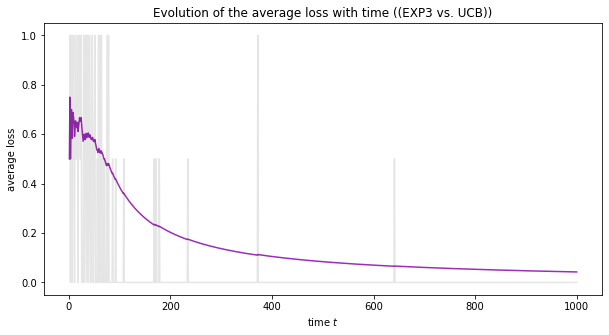

In [64]:
plot_avg_loss(np.mean(loss, axis=0), save_fig=save_fig_flag, save_name='p1_8_loss_avg', algo='(EXP3 vs. UCB)')

Question 9 (**optional**)

Question 10 (**optional**)